**Problem statement:** 

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [5]:
# Uploading the dataset file in google-colab working directory.
# This step is not needed if not using Google-colab
from google.colab import files
files.upload()

Saving mediacompany.csv to mediacompany.csv


{'mediacompany.csv': b'Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,\r3/1/2017,183738,1260228,1706478,1060860448,0,0,\r3/2/2017,193763,1270561,1690727,1031846645,0,0,\r3/3/2017,210479,1248183,1726157,1010867575,0,0,\r3/4/2017,240061,1492913,1855353,1079194579,1,0,\r3/5/2017,446314,1594712,2041418,1357736987,0,0,\r3/6/2017,342997,1330689,1742540,1140228426,0,0,\r3/7/2017,227313,1363579,1821742,1113811802,0,0,\r3/8/2017,180313,1353483,1795456,1083475096,0,0,\r3/9/2017,178800,1345428,1794157,1067636147,0,0,\r3/10/2017,201180,1344540,1834967,1081234843,0,0,\r3/11/2017,218956,1500926,1926280,1119900035,0,0,\r3/12/2017,437117,1554859,2015050,1390620085,0,0,\r3/13/2017,263638,1438887,1808967,1231295791,0,0,\r3/14/2017,185896,1459500,1864134,1210330496,0,0,\r3/15/2017,184346,1410668,1896352,1189319112,0,0,\r3/16/2017,132409,1394130,1867785,1152287474,0,0,\r3/17/2017,169225,1438125,1885937,1172698178,0,0,\r3/18/2017,251851,1582773,2016477,1329477115,0,0,

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
media = pd.read_csv('mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [10]:
media = media.drop('Unnamed: 7', axis = 1)
media.head(1)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0


In [12]:
# converting datetime into pandas datetime format
media["Date"] = pd.to_datetime(media['Date'])
media.head(3)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0


In [13]:
# deriving a column for days since the show started

from datetime import date

d0 = pd.to_datetime(date(2017, 2, 28))
d1 = media.Date
d2 = media['Date']
print(type(d1),type(d2),type(d0))
delta = (d1 - d0)

media['Day'] = delta

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [15]:
# removing text 'days' from column Day
media['Day'] = media['Day'].astype(str)
media['Day'] = media['Day'].map(lambda x: x[0:2])
media['Day'] = media['Day'].astype(int)

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


Text(0, 0.5, 'Views_show')

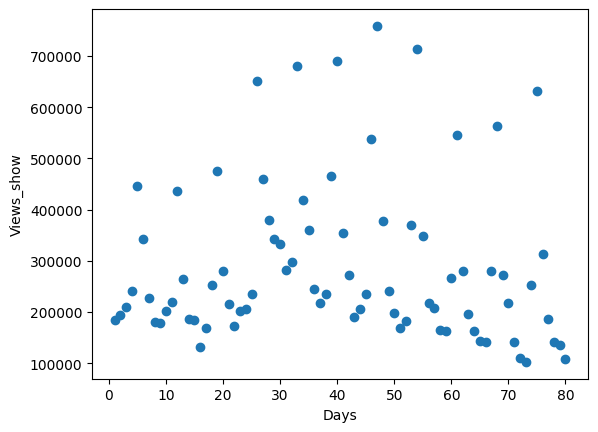

In [16]:
plt.scatter(media['Day'], media['Views_show'], )
plt.xlabel('Days')
plt.ylabel('Views_show')

<Axes: xlabel='Day'>

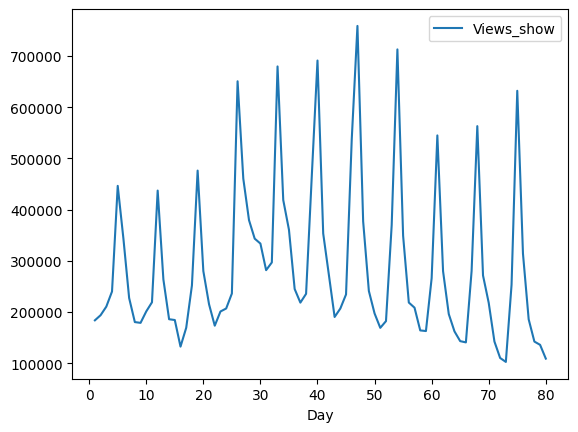

In [17]:
# days vs views graph

media.plot.line(x='Day', y='Views_show')

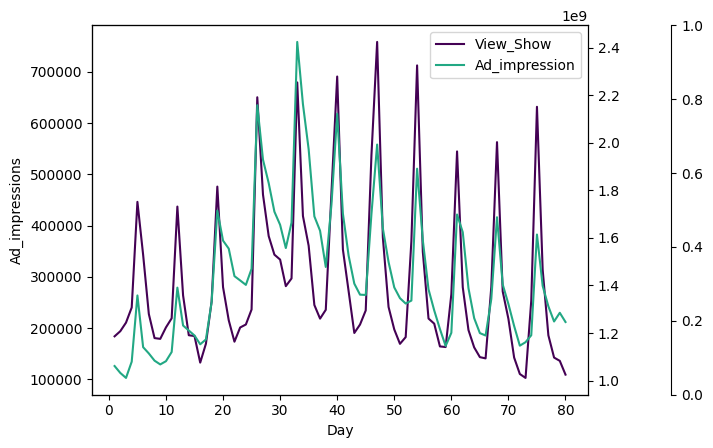

In [23]:
# comparing Views_show and Ad_impressions with respect to days

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('Views_show')
host.set_ylabel('Ad_impressions')

colour1 = plt.cm.viridis(0)
colour2 = plt.cm.viridis(0.6)
colour3 = plt.cm.viridis(0.8)

p1, = host.plot(media.Day,media.Views_show, color=colour1,label="View_Show")
p2, = par1.plot(media.Day,media.Ad_impression,color=colour2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))

plt.show()

In [24]:
# Adding a 'weekday' as a derived column to compare
media['weekday'] = (media['Day']+3)%7
media.head(14)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6


In [25]:
# Replacing value 0 with 7 in weekday column

media.weekday.replace(0, 7, inplace=True)
media.head(14)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6


In [26]:
media.weekday = media.weekday.astype(int)
print(type(media.weekday[1]))

<class 'numpy.int64'>


<Axes: >

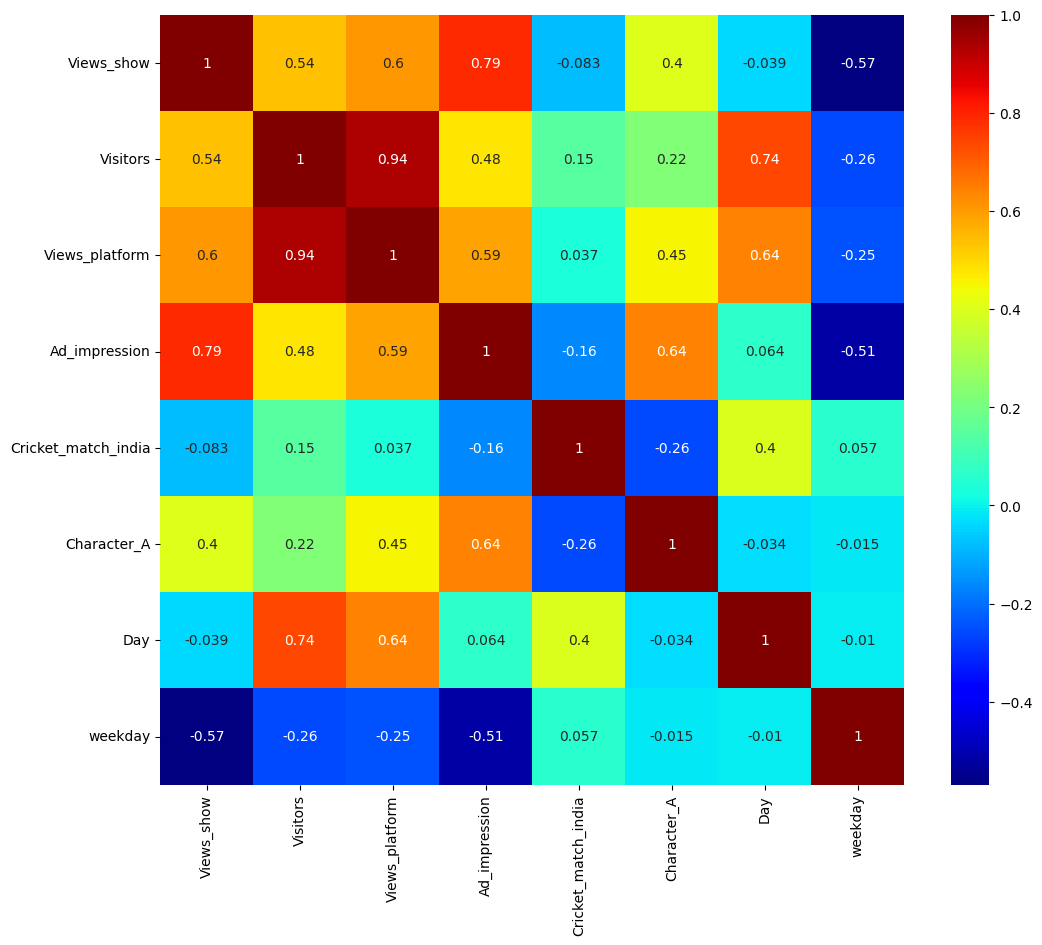

In [27]:
# Plotting heatmap for getting the feature co-relations
fig = plt.figure(figsize = (12, 10))
sns.heatmap(media.corr(), annot=True, cmap='jet')

In [28]:
# Making 1st model with 'weekday' and 'Visitors' as feature variable
X = media[['Visitors', 'weekday']]
y = media[['Views_show']]

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Creating linear regression object
lm = LinearRegression()

In [31]:
lm.fit(X, y)

LinearRegression()

In [32]:
import statsmodels.api as sm

In [33]:
# Adding constent and making a OLS model
X = sm.add_constant(X)
lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 08 May 2023   Prob (F-statistic):           8.01e-12
Time:                        11:42:22   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [34]:
# Creating a derived column as 'weekends' to analyse the traffic flow on weekends
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['Day']]

In [35]:
media.head(14)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2,0
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3,0
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4,0
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5,0
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6,0


In [36]:
# Making 2nd model with 'weekend' and 'Visitors' as feature variable
X = media[['Visitors', 'weekend']]
y = media[['Views_show']]

In [37]:
# Adding constent and making 2nd OLS model
X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.51e-12
Time:                        11:42:34   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [38]:
# Making 3rd model with 'weekend', 'Visitors' and 'Character_A' as feature variable
X = media[['Visitors', 'weekend', 'Character_A']]
y = media[['Views_show']]

In [39]:
# Adding constent and making 2nd OLS model
X = sm.add_constant(X)
lm_3 = sm.OLS(y, X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.53e-14
Time:                        11:42:39   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [40]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,2,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,3,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,4,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,5,0
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80,6,0


In [41]:
media['lag_views'] = np.roll(media['Views_show'], 1)
media.lag_views.replace(108961, 0, inplace=True)

In [42]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [43]:
# Making 4th model with 'weekend', 'Visitors', 'Character_A' and 'lag_views' as feature variable
X = media[['Visitors', 'weekend', 'Character_A', 'lag_views']]
y = media[['Views_show']]

In [44]:
# Adding constent and making 2nd OLS model
X = sm.add_constant(X)
lm_4 = sm.OLS(y, X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Mon, 08 May 2023   Prob (F-statistic):           3.16e-21
Time:                        11:42:52   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

<Axes: >

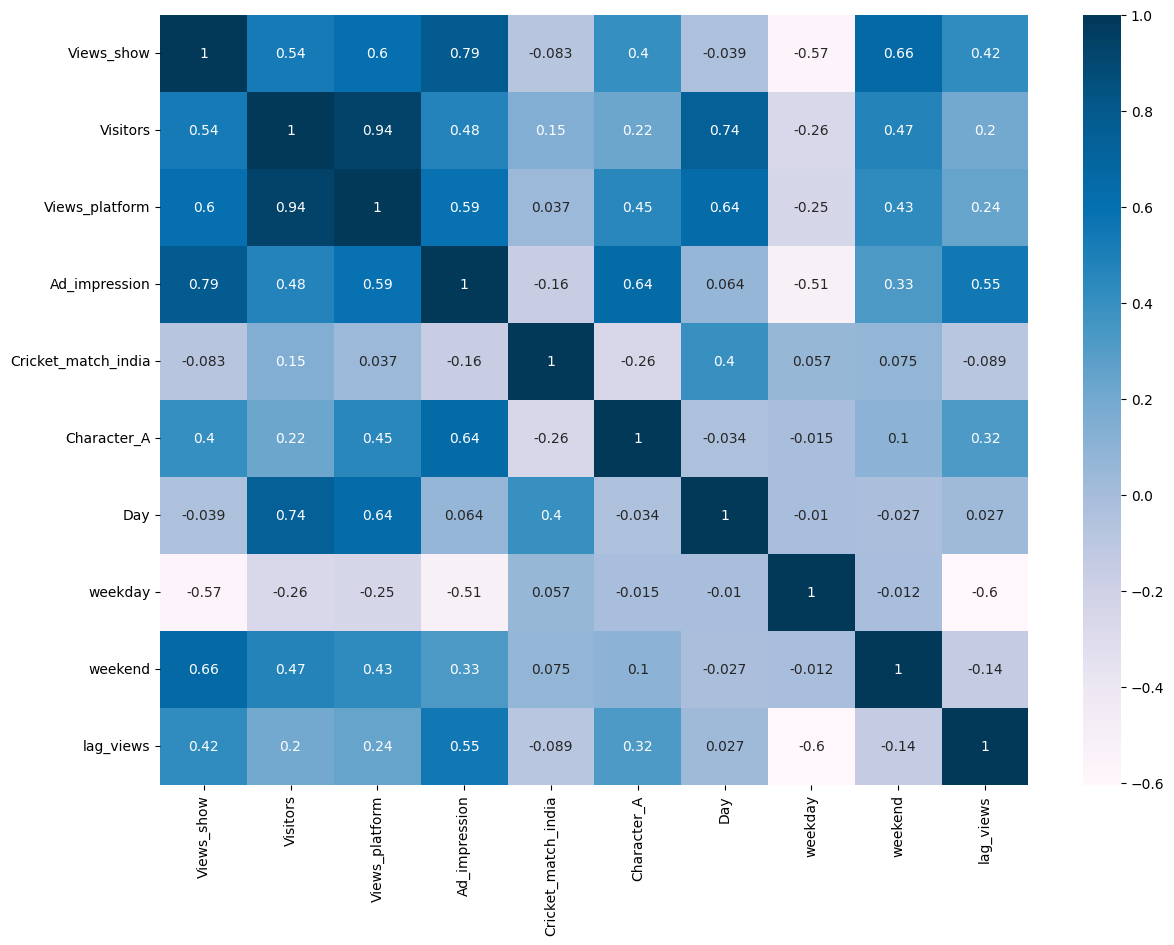

In [45]:
fig = plt.figure(figsize = (14, 10))
sns.heatmap(media.corr(), annot=True, cmap='PuBu')

In [46]:
# Making 5th model with 'weekend', 'Character_A' and 'Ad_impression' as feature variable
X = media[['weekend', 'Character_A', 'Ad_impression']]
y = media[['Views_show']]

In [47]:
# Adding constent and making 2nd OLS model
X = sm.add_constant(X)
lm_5 = sm.OLS(y, X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.05e-26
Time:                        11:43:01   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [48]:
# converting Ad_impression into Ad_impression in one million
media['Ad_impression_million'] = media.Ad_impression/1000000

In [49]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,lag_views,Ad_impression_million
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0,1060.860448
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738,1031.846645
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763,1010.867575
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479,1079.194579
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061,1357.736987


In [50]:
# Making 6th model with 'weekend', 'Character_A', 'Ad_impression_million' and 'Cricket_match_india' as feature variable
X = media[['weekend', 'Character_A', 'Ad_impression_million', 'Cricket_match_india']]
y = media['Views_show']

In [51]:
# Adding constent and making 2nd OLS model
X = sm.add_constant(X)
lm_6 = sm.OLS(y, X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.02e-25
Time:                        11:43:15   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [52]:
# Making 7th model with 'weekend', 'Character_A' and 'Ad_impression_million' as feature variable
X = media[['weekend', 'Character_A', 'Ad_impression_million']]
y = media['Views_show']

In [53]:
# Adding constent and making 2nd OLS model
X = sm.add_constant(X)
lm_7 = sm.OLS(y, X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.05e-26
Time:                        11:43:20   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

Making prediction with Liner model 7. 'weekend', 'Character_A', 'Ad_impression_million'

In [68]:
# Making predictions using the model
X = media[['weekend','Character_A','Ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_7.predict(X)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
R2 = r2_score(media.Views_show, Predicted_views)

In [70]:
print("Mean squared error: ",mse)
print("R squared value: ", R2)

Mean squared error:  4677651616.2534075
R squared value:  0.802643446857565


In [71]:
media.shape

(80, 12)

Text(0, 0.5, 'Views')

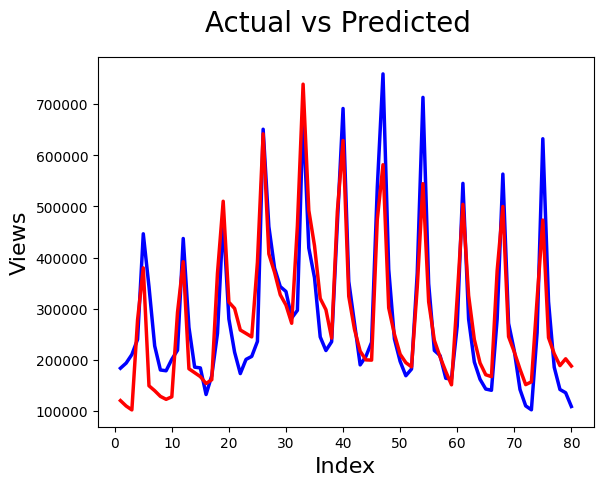

In [72]:
# Plotting actual vs predicted values
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show, color = 'blue', linewidth = 2.5, linestyle="-")
plt.plot(c, Predicted_views, color = 'red', linewidth = 2.5, linestyle="-")
fig.suptitle("Actual vs Predicted", fontsize=20)
plt.xlabel('Index', fontsize = 16)
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show - Predicted_views')

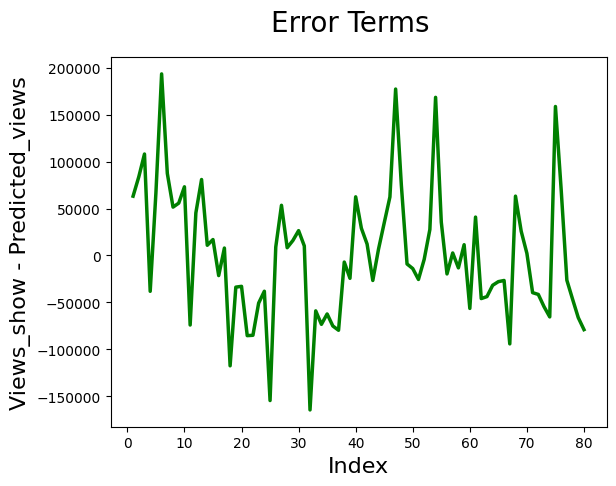

In [73]:
# plotting error terms
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show - Predicted_views, color = 'green', linewidth = 2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel('Index', fontsize = 16)
plt.ylabel('Views_show - Predicted_views', fontsize = 16)

<Axes: ylabel='Density'>

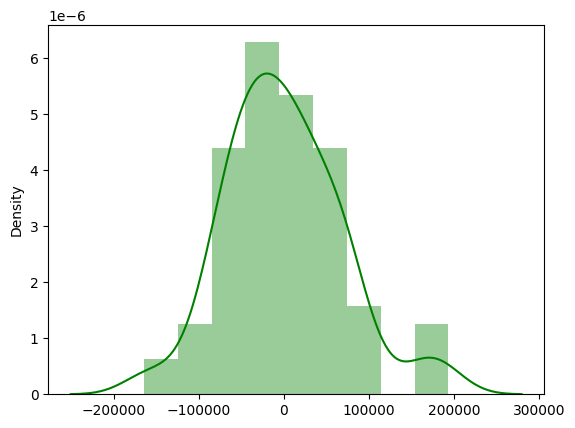

In [82]:
# Error terms plotting using distributio plot
res = media.Views_show - Predicted_views
sns.distplot(res, color="green")

Making predections with 3rd model with 'weekend', 'Visitors' and 'Character_A'

In [74]:
X = media[['Visitors', 'weekend', 'Character_A']]
X = sm.add_constant(X)
Predicted_views_3 = lm_3.predict(X)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views_3)
r2 = r2_score(media.Views_show, Predicted_views_3)

In [76]:
print('Mean_Squared_Error: ', mse)
print('r_square_value: ',r2)

Mean_Squared_Error:  9815432480.45152
r_square_value:  0.5858734080979341


Text(0, 0.5, 'Views')

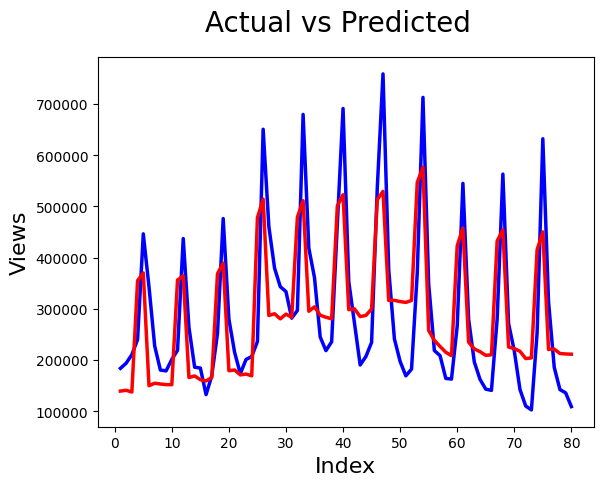

In [77]:
# Here plotting actual vs predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, media.Views_show, color = 'blue', linewidth = 2.5, linestyle="-")
plt.plot(c, Predicted_views_3, color = 'red', linewidth = 2.5, linestyle="-")
fig.suptitle("Actual vs Predicted", fontsize=20)
plt.xlabel('Index', fontsize = 16)
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show - Predicted_views_3')

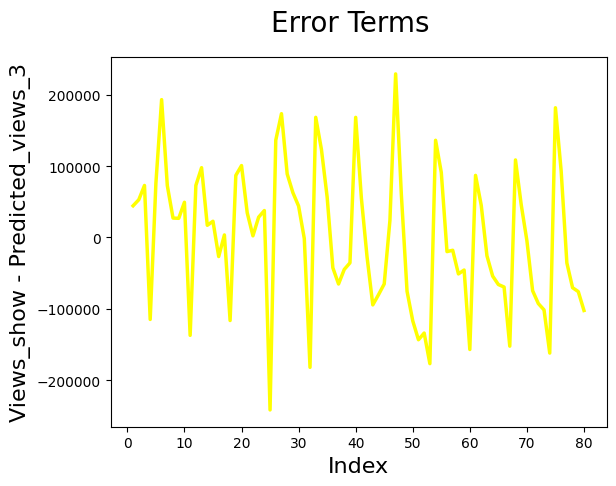

In [79]:
# Plotting error terms here
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show - Predicted_views_3, color = 'yellow', linewidth = 2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel('Index', fontsize = 16)
plt.ylabel('Views_show - Predicted_views_3', fontsize = 16)

<Axes: ylabel='Density'>

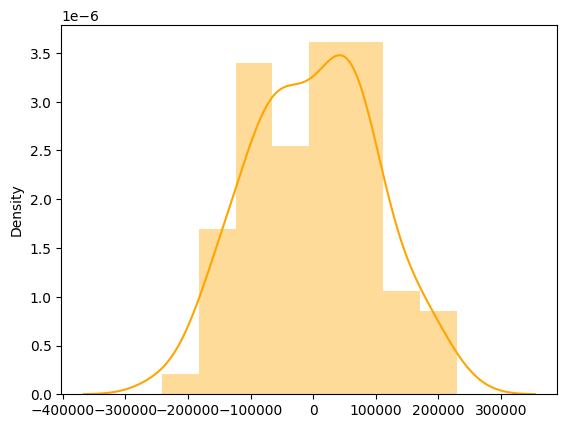

In [81]:
# Error terms plotting using distributio plot
res = media.Views_show - Predicted_views_3
sns.distplot(res, color = "orange")

Making predictions using model 5 Making 'weekend', 'Character_A' and 'Ad_impression'

## Conclusin

**Ad Impressions** and **Character A** as the driver variables that could be used to increase the viewership of the show. Ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, better viewership could be achieved. Similarly, Character A’s absence and presence create a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables can be acted upon to improve the show viewership.